In [2]:
#import main libraries
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

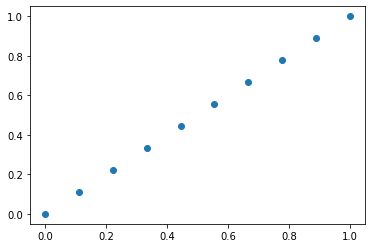

In [3]:
#Making a set of data and time
y = np.linspace(0,1,10)
t = np.linspace(0,1,10)

plt.plot(t,y, 'o')

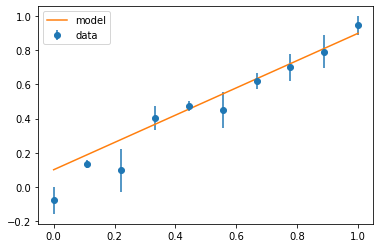

In [5]:
#Adding withe noise to the set of data
noise = np.random.normal(0, 0.09, y.shape)
signal = y + noise

#Creating a line function
def line(a,b,t):
    f = a + b*t
    return f

a = 0.1
b = 0.8
f = line(a,b,t)

#Plotting with error bars
plt.errorbar(t,signal, yerr = noise, label = "data", fmt = "o")
plt.plot(t, f, label = "model")
plt.legend()
plt.show()

# Gaussian Likelihood


$ L = P(D|M) = \left[ \prod_{i = 1}^{n} \frac{1}{\sqrt{2 \pi \sigma_{i}^{2}}} \right]exp\left[ \sum_{i =1}^{n} \frac{1}{2} \frac{(y_{i} - f_{i})^{2}}{\sigma_{i}^{2}} \right] $

## Taking the natural log to the Gaussian Likelihood:


$ \ln(L) = \sum_{i = 1}^{n}  \ln \left[ \frac{1}{\sqrt{2 \pi \sigma_{i}^{2}}} \right] + \sum_{i = 1}^{n} \frac{1}{2} \frac{(y_{i} - f_{i})^{2}}{\sigma_{i}^{2}} $

$ log(L) = \sum_{i=1}^{n} \left[ \ln \left( \frac{1}{\sqrt{2 \pi \sigma_{i}^{2}}} \right) + \frac{1}{2} \frac{(y_{i} - f_{i})^{2}}{\sigma_{i}^{2}} \right]$

In [54]:
#Defining a function for the logarithmic Gaussian likelihood
def lolik(signal):
    loli = []
    i = 1
    for i in range(0,len(t)):
        f[i] = a + b*t[i]
        loli.append(np.log(1/np.sqrt(2*np.pi*noise[i]**2)) + ((signal[i] - f[i])**2)/(2*(noise[i]**2)))
        i = i +1
    return loli

In [55]:
loli = lolik(signal)

In [56]:
print(loli)

[1.244554986184079, 19.421846294350196, 3.262139663735248, 10.572370756515088, 4.409396774548958, 5.518129065624583, 5.139065914647272, 16.78327498647111, 2.701301275904013, 6.68380092164487]


In [45]:
#Converting to a numpy array
log_like = np.array(loli)

In [52]:
#Maximizing the likelihood
lik_model = minimize(lolik,0)

IndexError: index 1 is out of bounds for axis 0 with size 1